In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("../Datasets/Leonardo/dados_leonardo.csv")

## Passo 1: Leitura dos dados
Leitura dos bancos de dados em DataFrame Pandas. 

In [3]:
df.columns

Index(['MessageID', 'SensorID', 'Sensor Name', 'Date', 'Value', 'Battery',
       'Sensor State', 'GatewayID', 'Alert Sent', 'Signal Strength', 'Voltage',
       'X', 'Y', 'Z', 'Comportamento'],
      dtype='object')

In [4]:
df = df.drop(columns=['MessageID', 'Sensor Name', 'Battery', 'Sensor State', 'GatewayID', 'Signal Strength', 'Alert Sent'])

In [5]:
df

,SensorID,Date,Value,Voltage,X,Y,Z,Comportamento
0,175810,2019-01-21 08:15:03,1.115,3.04,-0.171,1.115,0.242,Pastejando
1,175810,2019-01-21 08:16:03,0.689,3.03,-0.610,0.120,0.689,Locomovendo
2,175810,2019-01-21 08:16:04,0.583,3.02,-0.702,0.071,0.583,Pastejando
3,175810,2019-01-21 08:16:05,0.683,3.01,-0.594,-0.026,0.683,Pastejando
4,175810,2019-01-21 08:16:06,0.631,3.01,-0.706,0.059,0.631,Pastejando
...,...,...,...,...,...,...,...,...
140735,434137,2019-02-22 17:45:06,0.844,2.83,0.844,0.571,-0.957,Ocio EM PE
140736,434137,2019-02-22 17:45:12,0.628,2.82,-0.114,0.628,-1.772,Ocio EM PE
140737,434137,2019-02-22 17:45:11,0.835,2.84,0.428,0.835,-0.015,Ocio EM PE
140738,434137,2019-02-22 17:45:13,0.811,2.84,0.487,0.811,0.150,Ocio EM PE


## Passo 2: Pré-processamento


In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Função para calcular acuracia de cada etapa do Pré-processamento
def calc_acuracia(X_train, X_test, y_train, y_test):
    model = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print("Acurácia da etapa nos dados de teste:", end=" ")
    print(accuracy_score(y_test, preds)*100)
    preds = model.predict(X_train)
    print("Acurácia da etapa nos dados de treino:", end=" ")
    print(accuracy_score(y_train, preds)*100)

### 2.1 Lidando com dados faltantes

In [7]:
df[df.isnull().any(axis=1)]

,SensorID,Date,Value,Voltage,X,Y,Z,Comportamento


In [8]:
df.isnull().sum()

SensorID         0
Date             0
Value            0
Voltage          0
X                0
Y                0
Z                0
Comportamento    0
dtype: int64

### 2.2 Tratamento de dados categóricos

In [9]:
np.unique(df['Comportamento'])

array(['Agua', 'Locomovendo', 'Ocio DEITADO', 'Ocio EM PE', 'Pastejando',
       'Ruminando DEITADO', 'Ruminando EM PE'], dtype=object)

In [10]:
df = df.replace(['Ocio DEITADO', 'Ocio EM PE'], 'Ocio')

In [11]:
df = df.replace(['Ruminando DEITADO', 'Ruminando EM PE'], 'Ruminando')

In [12]:
# Devido a baixa quantidade de dados desses comportamentos em relação ao de mais, suas obseravações são deletadas

df = df.replace(['Agua', 'Locomovendo'], np.NaN)
df = df.dropna(axis=0)

In [13]:
# Para manter conformidade com o One-Hot encoding dos dados do Lázaro
df.insert(8, "Season_fall", 0)
df.insert(9, "Season_spring", 0)
df.insert(10, "Season_summer", 1)

In [14]:
df

,SensorID,Date,Value,Voltage,X,Y,Z,Comportamento,Season_fall,Season_spring,Season_summer
0,175810,2019-01-21 08:15:03,1.115,3.04,-0.171,1.115,0.242,Pastejando,0,0,1
2,175810,2019-01-21 08:16:04,0.583,3.02,-0.702,0.071,0.583,Pastejando,0,0,1
3,175810,2019-01-21 08:16:05,0.683,3.01,-0.594,-0.026,0.683,Pastejando,0,0,1
4,175810,2019-01-21 08:16:06,0.631,3.01,-0.706,0.059,0.631,Pastejando,0,0,1
5,175810,2019-01-21 08:16:07,0.604,3.01,-0.805,0.081,0.604,Pastejando,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
140735,434137,2019-02-22 17:45:06,0.844,2.83,0.844,0.571,-0.957,Ocio,0,0,1
140736,434137,2019-02-22 17:45:12,0.628,2.82,-0.114,0.628,-1.772,Ocio,0,0,1
140737,434137,2019-02-22 17:45:11,0.835,2.84,0.428,0.835,-0.015,Ocio,0,0,1
140738,434137,2019-02-22 17:45:13,0.811,2.84,0.487,0.811,0.150,Ocio,0,0,1


### 2.3 Tratamento de outliers

#### Estatística básica dos dados

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid", palette="rainbow")
%matplotlib inline

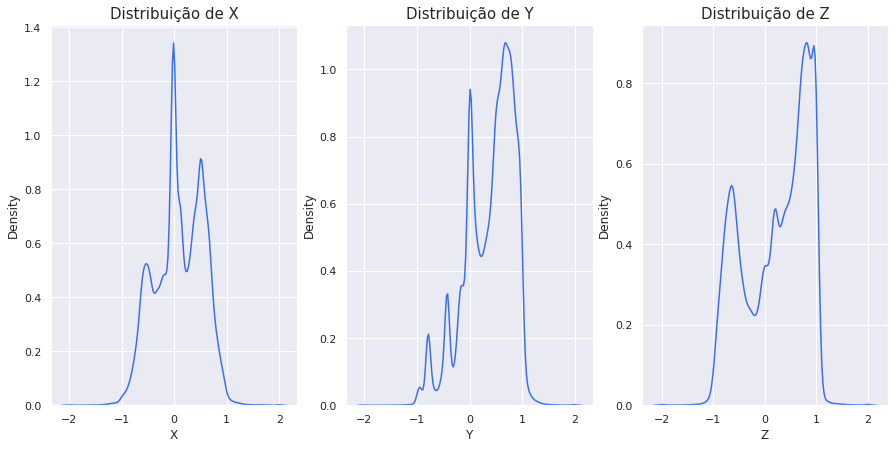

In [16]:
plt.figure(figsize=(15,7))
plt.subplot(1,3,1)
plt.title("Distribuição de X", fontsize=15)
sns.kdeplot(data = df["X"])
plt.subplot(1,3,2)
plt.title("Distribuição de Y", fontsize=15)
sns.kdeplot(data = df["Y"])
plt.subplot(1,3,3)
plt.title("Distribuição de Z", fontsize=15)
sns.kdeplot(data = df["Z"])
plt.show()

#### Usando especificações do sensor

In [17]:
df.describe()

,SensorID,Value,Voltage,X,Y,Z,Season_fall,Season_spring,Season_summer
count,138999.000000,138999.000000,138999.000000,138999.000000,138999.000000,138999.000000,138999.0,138999.0,138999.0
mean,375381.364571,0.751133,2.883697,0.095852,0.383239,0.227630,0.0,0.0,1.0
std,90941.468910,0.214106,0.068649,0.450015,0.459595,0.617134,0.0,0.0,0.0
min,175810.000000,-1.999000,2.640000,-1.999000,-1.999000,-1.999000,0.0,0.0,1.0
25%,304767.000000,0.652000,2.850000,-0.218000,0.036000,-0.349000,0.0,0.0,1.0
50%,434136.000000,0.775000,2.890000,0.086000,0.497000,0.379000,0.0,0.0,1.0
75%,434138.000000,0.893000,2.930000,0.478000,0.745000,0.768000,0.0,0.0,1.0
max,434139.000000,2.000000,3.240000,2.000000,2.000000,2.000000,0.0,0.0,1.0


In [18]:
# Range mínimo e máximo do aceleromêtro
min = float(-1.999)
max = float(1.999)

In [19]:
df.loc[df.X > max, 'X'] = max
df.loc[df.Y > max, 'Y'] = max
df.loc[df.Z > max, 'Z'] = max

df.loc[df.X < min, 'X'] = min
df.loc[df.Y < min, 'Y'] = min
df.loc[df.Z < min, 'Z'] = min

### 2.5 Criação de novas features

#### Magnitude

In [20]:
a = df[['X', 'Y', 'Z']].pow(2)

In [21]:
a = a.sum(axis=1)

In [22]:
magn = a.pow(1/2)
magn = magn.rename('magn')

In [23]:
df = pd.concat([df, magn], axis=1)

#### Signal Magnitude Area

In [24]:
a = df[['X', 'Y', 'Z']].abs()

In [25]:
sma = a.sum(axis=1)
sma = sma.rename('sma')

In [26]:
df = pd.concat([df, sma], axis=1)

#### Entropy

In [27]:
a = df[['X', 'Y', 'Z']]

In [28]:
a = a.sum(axis=1)

In [29]:
a = a + 1

In [30]:
a = a**2

In [31]:
a = a.replace(to_replace=0, value=0.0001) # Pois ln de 0 é indefinido

In [32]:
b = np.log(a)

In [33]:
ent = a*b
ent = ent.rename('ent')

In [34]:
df = pd.concat([df, ent], axis=1)

#### Energy 

In [35]:
a = df[['X', 'Y', 'Z']]

In [36]:
a = a**2

In [37]:
a = a.sum(axis=1)

In [38]:
erg = a**2
erg = erg.rename('erg')

In [39]:
df = pd.concat([df, erg], axis=1)

#### Pitch

In [41]:
a = df[['X', 'Y']]

In [42]:
a = a**2

In [43]:
a = a.sum(axis=1)

In [44]:
a = a**(1/2)

In [45]:
b = -df.Z

In [46]:
a = b/a

In [47]:
a = np.arctan(a)

In [48]:
pit = a*(180/np.pi)

In [49]:
pit = pit.rename('pit')

In [50]:
df = pd.concat([df, pit], axis=1)

#### Roll

In [51]:
a = df[['X', 'Y']]

In [52]:
rol = np.arctan2(a.X, a.Y)*(180/np.pi)

In [53]:
rol = rol.rename('rol')

In [54]:
df = pd.concat([df, rol], axis=1)

#### Inclination

In [57]:
a = df[['X', 'Y', 'Z']]

In [58]:
a = ((a.Z**2 + a.Y**2)**(1/2))/a.X

In [59]:
icl = np.arctan(a)*(180/np.pi)

In [60]:
icl = icl.rename('icl')

In [61]:
df = pd.concat([df, icl], axis=1)

### 2.6 Testes com train_size

In [89]:
df.columns

Index(['SensorID', 'Date', 'Value', 'Voltage', 'X', 'Y', 'Z', 'Comportamento',
       'Season_fall', 'Season_spring', 'Season_summer', 'magn', 'sma', 'ent',
       'erg', 'pit', 'rol', 'icl'],
      dtype='object')

In [90]:
X = df[['X', 'Y', 'Z', 'Season_fall', 'Season_spring', 'Season_summer', 'magn',
        'sma', 'ent', 'erg', 'pit', 'rol', 'icl']]
y = df.Comportamento

In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.10, random_state=0)

In [92]:
calc_acuracia(X_train, X_test, y_train, y_test)

Acurácia da etapa nos dados de teste: 72.15667466027178
Acurácia da etapa nos dados de treino: 99.99280523778688


In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.50, random_state=0)

In [94]:
calc_acuracia(X_train, X_test, y_train, y_test)

Acurácia da etapa nos dados de teste: 75.4748201438849
Acurácia da etapa nos dados de treino: 99.96402825939941


In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=0)

In [96]:
calc_acuracia(X_train, X_test, y_train, y_test)

Acurácia da etapa nos dados de teste: 76.54676258992805
Acurácia da etapa nos dados de treino: 99.95169528977688


In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=0)

In [98]:
calc_acuracia(X_train, X_test, y_train, y_test)

Acurácia da etapa nos dados de teste: 76.61007194244604
Acurácia da etapa nos dados de treino: 99.94724170016019


In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=0)

In [100]:
calc_acuracia(X_train, X_test, y_train, y_test)

Acurácia da etapa nos dados de teste: 76.54676258992805
Acurácia da etapa nos dados de treino: 99.9496398348906


In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85, random_state=0)

In [102]:
calc_acuracia(X_train, X_test, y_train, y_test)

Acurácia da etapa nos dados de teste: 76.81534772182255
Acurácia da etapa nos dados de treino: 99.95090944485354


### 2.7 Seleção de features

In [80]:
X = df[['X', 'Y', 'Z', 'magn',
        'sma', 'ent', 'erg', 'pit', 'rol', 'icl']]
y = df.Comportamento

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=0)

In [82]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

k_vs_score = []

for k in range(3,11,1):
  selector = SelectKBest(score_func=f_classif, k=k)

  X_train2 = selector.fit_transform(X_train, y_train)
  X_test2 = selector.transform(X_test)

  mdl = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
  mdl.fit(X_train2, y_train)

  preds = mdl.predict(X_test2)

  score = accuracy_score(y_test, preds)
  print("k = {} - Acurácia = {}".format(k, score))

  k_vs_score.append(score)


k = 3 - Acurácia = 0.7194484412470024
k = 4 - Acurácia = 0.7234292565947242
k = 5 - Acurácia = 0.7303836930455635
k = 6 - Acurácia = 0.7577218225419664
k = 7 - Acurácia = 0.7604796163069545
k = 8 - Acurácia = 0.7637170263788969
k = 9 - Acurácia = 0.7641486810551559
k = 10 - Acurácia = 0.7625179856115107


<AxesSubplot:>

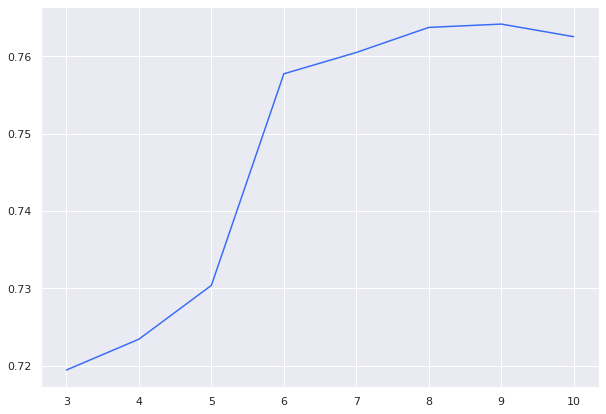

In [84]:
pd.Series(k_vs_score, index=range(3,11,1)).plot(figsize=(10,7))

In [86]:
selector = SelectKBest(score_func=f_classif, k=8)
selector.fit(X_train, y_train)

SelectKBest(k=8)

In [87]:
mask = selector.get_support()
X_test.columns[mask]
# Features mais relevantes

Index(['X', 'Y', 'Z', 'magn', 'sma', 'pit', 'rol', 'icl'], dtype='object')

<AxesSubplot:>

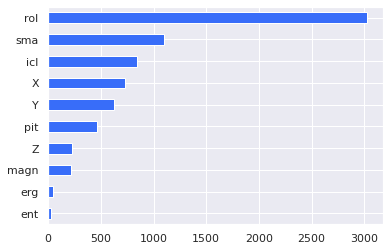

In [88]:
pd.Series(selector.scores_, index=X_train.columns).sort_values().plot.barh()

### 2.8 Gravação do conjunto de dados após o pré-processamento

In [76]:
df

,SensorID,Date,Value,Voltage,X,Y,Z,Comportamento,Season_fall,Season_spring,Season_summer,magn,sma,ent,erg,pit,rol,icl
0,175810,2019-01-21 08:15:03,1.115,3.04,-0.171,1.115,0.242,Pastejando,0,0,1,1.153703,1.528,7.474426,1.771641,-12.108253,-8.719130,-81.476304
2,175810,2019-01-21 08:16:04,0.583,3.02,-0.702,0.071,0.583,Pastejando,0,0,1,0.915278,1.356,-0.089163,0.701798,-39.565868,-84.224766,-39.916535
3,175810,2019-01-21 08:16:05,0.683,3.01,-0.594,-0.026,0.683,Pastejando,0,0,1,0.905539,1.303,0.138071,0.672402,-48.959606,-92.506296,-49.007300
4,175810,2019-01-21 08:16:06,0.631,3.01,-0.706,0.059,0.631,Pastejando,0,0,1,0.948724,1.396,-0.031235,0.810140,-41.690272,-85.222926,-41.913249
5,175810,2019-01-21 08:16:07,0.604,3.01,-0.805,0.081,0.604,Pastejando,0,0,1,1.009654,1.490,-0.197988,1.039180,-36.742843,-84.254174,-37.126721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140735,434137,2019-02-22 17:45:06,0.844,2.83,0.844,0.571,-0.957,Ocio,0,0,1,1.397936,2.372,1.603105,3.818999,43.202627,55.920065,52.861263
140736,434137,2019-02-22 17:45:12,0.628,2.82,-0.114,0.628,-1.772,Ocio,0,0,1,1.883445,2.514,-0.180361,12.583791,70.191298,-10.288788,-86.529915
140737,434137,2019-02-22 17:45:11,0.835,2.84,0.428,0.835,-0.015,Ocio,0,0,1,0.938421,1.278,8.187090,0.775516,0.915872,27.138536,62.865216
140738,434137,2019-02-22 17:45:13,0.811,2.84,0.487,0.811,0.150,Ocio,0,0,1,0.957805,1.448,10.730193,0.841604,-9.010073,30.984531,59.439071


In [77]:
# Geração de um zip com os dados em csv 
compression_opts = dict(method='zip', archive_name='dados_pre_processados_leonardo.csv') 

df.to_csv('dados_pre_processados_leonardo_final.zip', index=False, compression=compression_opts)